In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# -------------------------------------
# CONFIGURAÇÕES VISUAIS PADRONIZADAS
# -------------------------------------

# Paleta de cores
COLORS = {
    'primary': '#1f4e79',
    'secondary': '#2e86ab',
    'light': '#7fb3d3',
    'accent1': '#f39c12',
    'accent2': '#e74c3c',
    'accent3': '#27ae60',
    'neutral': '#95a5a6',
    'dark': '#2c3e50'
}

# Paleta de azuis para gráficos de uma categoria
BLUE_PALETTE = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7']

# Paleta para múltiplas regiões
REGIONAL_PALETTE = [COLORS['primary'], COLORS['accent1'], COLORS['accent2'], COLORS['accent3']]

# Configurações globais do matplotlib
plt.style.use('default')
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 11,
    'font.family': 'sans-serif',
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.linewidth': 0.8,
    'grid.alpha': 0.3,
    'axes.axisbelow': True,
    'axes.facecolor': '#fafafa',
    'figure.facecolor': 'white'
})

def add_value_labels(ax, bars, format_str='{:.2f}M', offset=0.01):
    """Adicionar labels de valor nas barras"""
    for bar in bars:
        if hasattr(bar, 'get_width'):
            width = bar.get_width()
            if width > 0:
                ax.text(width + offset, bar.get_y() + bar.get_height()/2, 
                       format_str.format(width), ha='left', va='center', 
                       fontweight='bold', color=COLORS['dark'], fontsize=9)
        else:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2, height + offset,
                       format_str.format(height), ha='center', va='bottom',
                       fontweight='bold', color=COLORS['dark'], fontsize=9)


In [3]:
# Carregar o DF final
df = pd.read_csv('vgsales_final.csv')

In [4]:
# -----------------------------------
# Q1 - Vendas Globais por Gênero
# -----------------------------------

# Estatísticas descritivas por gênero
genre_stats = df.groupby('Genre')['Global_Sales'].agg([
    'mean', 'median', 'std', 'count', 'sum'
]).round(2)
genre_stats = genre_stats.sort_values('mean', ascending=False)
genre_stats['total_percentage'] = (genre_stats['sum'] / df['Global_Sales'].sum() * 100).round(2)

print("ESTATÍSTICAS POR GÊNERO (ordenado por média):")
print(genre_stats)
print("\nTOP 5 GÊNEROS POR MÉDIA DE VENDAS:")
print(genre_stats.head())

ESTATÍSTICAS POR GÊNERO (ordenado por média):
              mean  median   std  count      sum  total_percentage
Genre                                                             
Platform      0.95    0.28  2.60    875   829.13              9.41
Shooter       0.80    0.23  1.83   1282  1026.20             11.65
Role-Playing  0.63    0.19  1.72   1470   923.83             10.48
Racing        0.59    0.19  1.68   1225   726.76              8.25
Sports        0.57    0.22  2.10   2304  1309.24             14.86
Action        0.53    0.19  1.17   3251  1722.84             19.55
Fighting      0.53    0.21  0.96    836   444.05              5.04
Misc          0.47    0.16  1.33   1686   789.87              8.96
Simulation    0.46    0.16  1.21    848   389.98              4.43
Puzzle        0.42    0.11  1.58    570   242.21              2.75
Strategy      0.26    0.09  0.52    670   173.27              1.97
Adventure     0.18    0.06  0.51   1274   234.59              2.66

TOP 5 GÊNEROS P

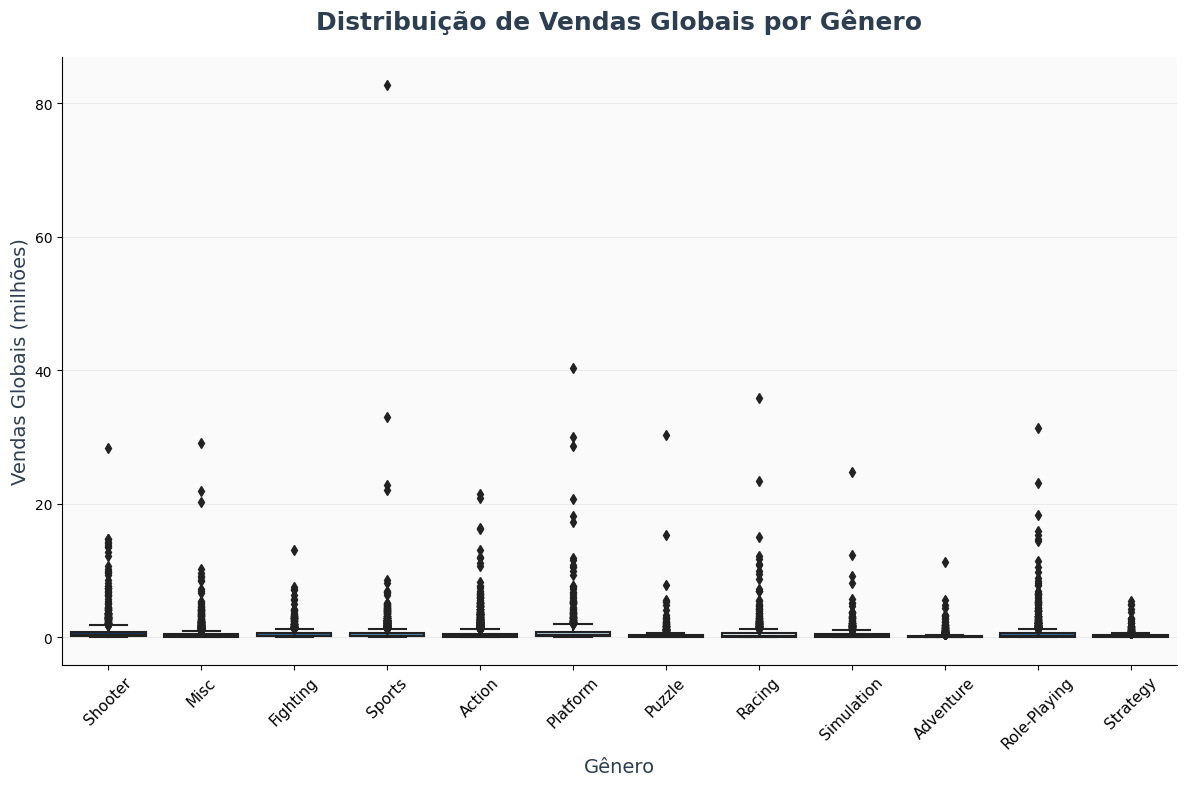

In [5]:
# Gráfico 1: Boxplot por gênero
fig, ax = plt.subplots(figsize=(12, 8))

# Criar boxplot
box_plot = sns.boxplot(data=df, x='Genre', y='Global_Sales', 
                       palette=BLUE_PALETTE[:len(df['Genre'].unique())], ax=ax)

# Customização
ax.set_title('Distribuição de Vendas Globais por Gênero', 
             fontsize=18, fontweight='bold', pad=20, color=COLORS['dark'])
ax.set_ylabel('Vendas Globais (milhões)', fontsize=14, color=COLORS['dark'])
ax.set_xlabel('Gênero', fontsize=14, color=COLORS['dark'])
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)

# Melhorar aparência das caixas
for patch in box_plot.artists:
    patch.set_alpha(0.8)
    patch.set_edgecolor(COLORS['dark'])
    patch.set_linewidth(1)

plt.tight_layout()
plt.show()

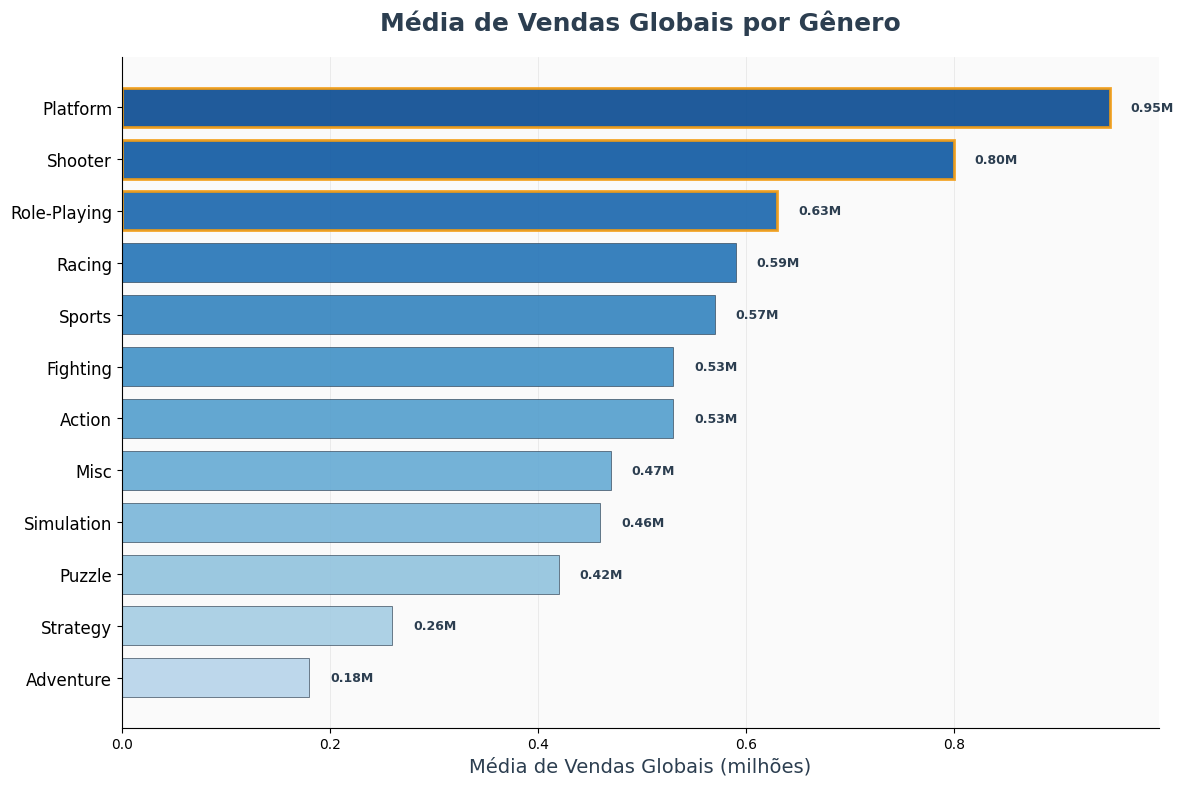

In [6]:
# Gráfico 2: Médias por gênero (horizontal)
fig, ax = plt.subplots(figsize=(12, 8))
genre_means = genre_stats['mean'].sort_values(ascending=True)

# Criar gradiente de azul do claro para escuro
n_genres = len(genre_means)
blues = plt.cm.Blues(np.linspace(0.3, 0.9, n_genres))
bars = ax.barh(range(len(genre_means)), genre_means.values, 
               color=blues, alpha=0.9, height=0.75, 
               edgecolor=COLORS['dark'], linewidth=0.5)

# Customização
ax.set_yticks(range(len(genre_means)))
ax.set_yticklabels(genre_means.index, fontsize=12)
ax.set_xlabel('Média de Vendas Globais (milhões)', fontsize=14, color=COLORS['dark'])
ax.set_title('Média de Vendas Globais por Gênero', 
             fontsize=18, fontweight='bold', pad=20, color=COLORS['dark'])

# Adicionar valores nas barras
add_value_labels(ax, bars, '{:.2f}M', 0.02)

# Grid mais sutil
ax.grid(True, alpha=0.3, axis='x', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Destacar os top 3
for i, bar in enumerate(bars[-3:], start=len(bars)-3):
    bar.set_edgecolor(COLORS['accent1'])
    bar.set_linewidth(2)

plt.tight_layout()
plt.show()

In [7]:
# ------------------------------------------------------
# Q2 - DIFERENÇAS REGIONAIS DE PREFERÊNCIA POR GÊNERO
# ------------------------------------------------------

# Proporções médias por região e gênero
regional_cols = ['%NA_Sales', '%EU_Sales', '%JP_Sales', '%Other_Sales']
regional_by_genre = df.groupby('Genre')[regional_cols].mean().round(1)
regional_by_genre = regional_by_genre.sort_values('%NA_Sales', ascending=False)

print("PROPORÇÕES MÉDIAS DE VENDAS POR REGIÃO E GÊNERO (%):")
print(regional_by_genre)

PROPORÇÕES MÉDIAS DE VENDAS POR REGIÃO E GÊNERO (%):
              %NA_Sales  %EU_Sales  %JP_Sales  %Other_Sales
Genre                                                      
Platform            0.6        0.2        0.1           0.1
Puzzle              0.6        0.2        0.2           0.0
Action              0.5        0.3        0.2           0.1
Misc                0.5        0.2        0.3           0.1
Racing              0.5        0.3        0.1           0.1
Shooter             0.5        0.3        0.1           0.1
Simulation          0.5        0.2        0.2           0.1
Sports              0.5        0.2        0.2           0.1
Fighting            0.4        0.2        0.4           0.1
Adventure           0.3        0.2        0.5           0.0
Role-Playing        0.3        0.2        0.5           0.1
Strategy            0.3        0.3        0.3           0.1


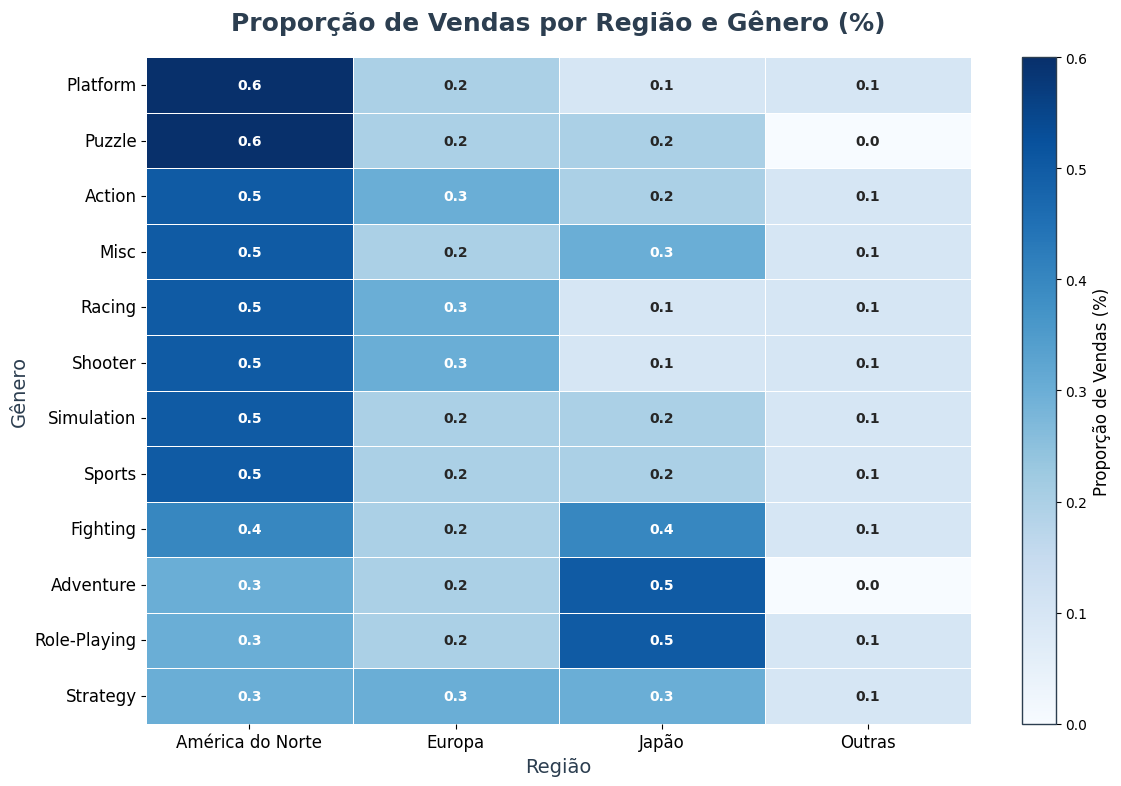

In [8]:
# Gráfico 3: Heatmap das proporções regionais
fig, ax = plt.subplots(figsize=(12, 8))

# Criar heatmap
heatmap = sns.heatmap(regional_by_genre, annot=True, fmt='.1f', 
                     cmap='Blues', cbar_kws={'label': 'Proporção de Vendas (%)'},
                     linewidths=0.5, linecolor='white', ax=ax,
                     square=False, annot_kws={'fontsize': 10, 'fontweight': 'bold'})

# Customização
ax.set_title('Proporção de Vendas por Região e Gênero (%)', 
             fontsize=18, fontweight='bold', pad=20, color=COLORS['dark'])
ax.set_ylabel('Gênero', fontsize=14, color=COLORS['dark'])
ax.set_xlabel('Região', fontsize=14, color=COLORS['dark'])

# Renomear labels dos eixos
ax.set_xticklabels(['América do Norte', 'Europa', 'Japão', 'Outras'], 
                   fontsize=12, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)

# Colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.outline.set_edgecolor(COLORS['dark'])
cbar.outline.set_linewidth(1)

plt.tight_layout()
plt.show()

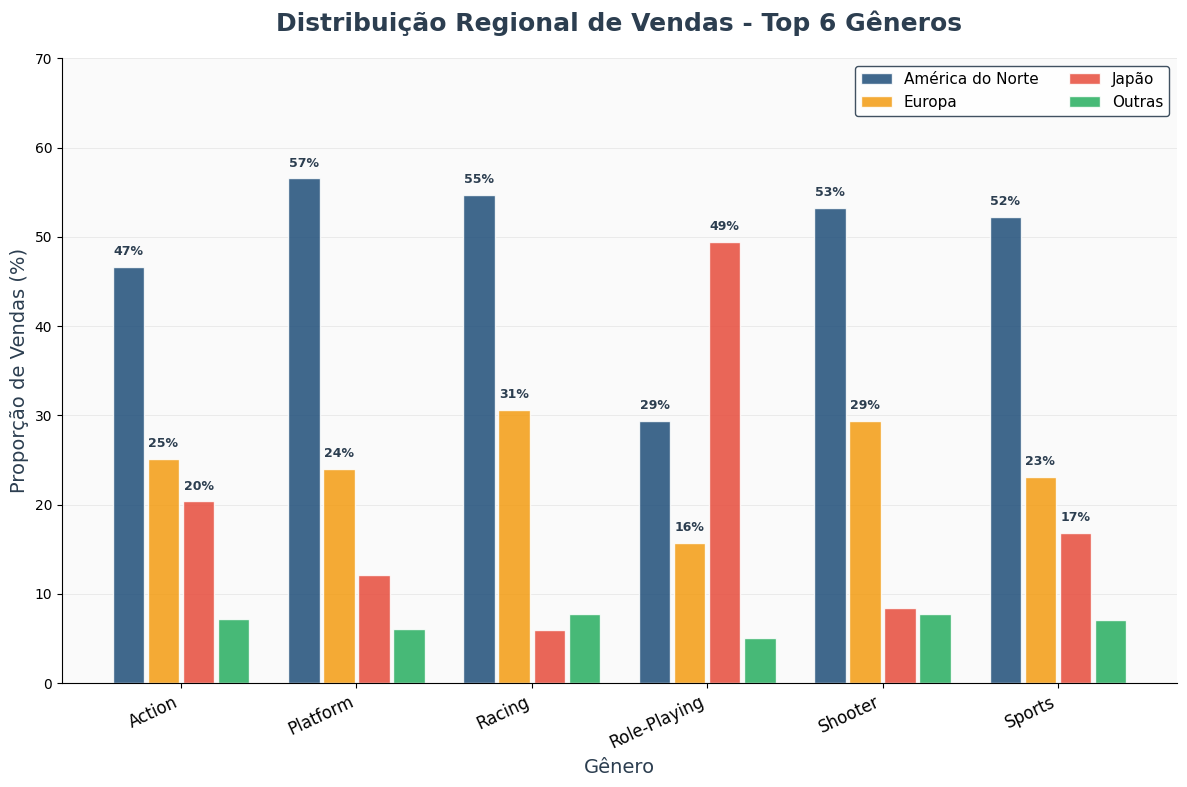

In [9]:
# Gráfico 4: Barras agrupadas por gênero (top 6 gêneros)
top_genres = genre_stats.head(6).index
df_top_genres = df[df['Genre'].isin(top_genres)]
regional_top = df_top_genres.groupby('Genre')[regional_cols].mean()

fig, ax = plt.subplots(figsize=(12, 8))

# Cores específicas para cada região
region_colors = REGIONAL_PALETTE
region_labels = ['América do Norte', 'Europa', 'Japão', 'Outras']

# Criar barras agrupadas
x = np.arange(len(regional_top.index))
width = 0.18
spacing = 0.02

for i, (col, color, label) in enumerate(zip(regional_cols, region_colors, region_labels)):
    values = regional_top[col].values * 100  # Converter para porcentagem
    position = x + (i - 1.5) * (width + spacing)
    bars = ax.bar(position, values, width, label=label,
                 color=color, alpha=0.85, edgecolor='white', linewidth=1)
    
    # Adicionar valores apenas nas barras maiores que 15%
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > 15:
            ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                   f'{height:.0f}%', ha='center', va='bottom',
                   fontsize=9, fontweight='bold', color=COLORS['dark'])

# Customização
ax.set_title('Distribuição Regional de Vendas - Top 6 Gêneros', 
             fontsize=18, fontweight='bold', pad=20, color=COLORS['dark'])
ax.set_xlabel('Gênero', fontsize=14, color=COLORS['dark'])
ax.set_ylabel('Proporção de Vendas (%)', fontsize=14, color=COLORS['dark'])
ax.set_xticks(x)
ax.set_xticklabels(regional_top.index, rotation=25, ha='right', fontsize=12)

# Definir limites do eixo Y
ax.set_ylim(0, 70)

# Legend melhorada
ax.legend(region_labels, loc='upper right', frameon=True, 
         fancybox=True, shadow=False, fontsize=11, ncol=2,
         edgecolor=COLORS['dark'], facecolor='white', framealpha=0.9)

# Grid mais sutil
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [10]:
# Análise de diferenças significativas
print("\nMAIORES DIFERENÇAS REGIONAIS:")
for genre in regional_by_genre.index:
    row = regional_by_genre.loc[genre]
    max_region = row.idxmax()
    min_region = row.idxmin()
    diff = row[max_region] - row[min_region]
    print(f"{genre}: {max_region.replace('%', '').replace('_Sales', '')} ({row[max_region]:.1f}%) vs "
          f"{min_region.replace('%', '').replace('_Sales', '')} ({row[min_region]:.1f}%) = {diff:.1f}pp de diferença")


MAIORES DIFERENÇAS REGIONAIS:
Platform: NA (0.6%) vs JP (0.1%) = 0.5pp de diferença
Puzzle: NA (0.6%) vs Other (0.0%) = 0.6pp de diferença
Action: NA (0.5%) vs Other (0.1%) = 0.4pp de diferença
Misc: NA (0.5%) vs Other (0.1%) = 0.4pp de diferença
Racing: NA (0.5%) vs JP (0.1%) = 0.4pp de diferença
Shooter: NA (0.5%) vs JP (0.1%) = 0.4pp de diferença
Simulation: NA (0.5%) vs Other (0.1%) = 0.4pp de diferença
Sports: NA (0.5%) vs Other (0.1%) = 0.4pp de diferença
Fighting: NA (0.4%) vs Other (0.1%) = 0.3pp de diferença
Adventure: JP (0.5%) vs Other (0.0%) = 0.5pp de diferença
Role-Playing: JP (0.5%) vs Other (0.1%) = 0.4pp de diferença
Strategy: NA (0.3%) vs Other (0.1%) = 0.2pp de diferença
